In [37]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.expanduser("~/Downloads/tim_data")

images = ["First", "Second", "Third", "Forth"]

emotions = ["Negative", "Neutral", "Positive"]

events = [31, 32, 33, 34,
          51, 52, 53, 54,
          71, 72, 73, 74]

columns = ["Event.Name", "Emotion", "Image", "SCR"]

measurement = "CDA.AmpSum"

all_subjects = pd.DataFrame(columns=columns)

averaged = pd.DataFrame(columns=["Emotion", "SCR"])

binned_df = pd.DataFrame(columns=["Emotion", "Bin", "SCR"])

In [38]:
for file in os.listdir(path):
    if not os.path.isdir(os.path.join(path, file)):
        continue
    if ".DS_Store" in file:
        continue
    if not file.startswith("sub-AL") or file == 'sub-AL24':
        continue
    subject = file
    print(f"Processing subject {subject}")
    df = pd.read_csv(os.path.join(path, file, f"{subject}_era_4s.txt"), sep="\t")
    df = df[df["Event.Name"].isin(events)]

    df["Emotion"] = [emotions[int(name) // 20 - 1] for name in df["Event.Name"]]
    df["Image"] = [int(name) % 10 for name in df["Event.Name"]]
    df["SCR"] = df[measurement]

    all_subjects = pd.concat([all_subjects, df[columns]], ignore_index=True)

    averages = [{"Emotion": "Negative",
                "SCR": df[df["Event.Name"].isin([31, 32, 33, 34])][measurement].mean()},
                {"Emotion": "Neutral",
                "SCR": df[df["Event.Name"].isin([51, 52, 53, 54])][measurement].mean()},
                {"Emotion": "Positive",
                "SCR": df[df["Event.Name"].isin([71, 72, 73, 74])][measurement].mean()}]
    
    averaged = pd.concat([averaged, pd.DataFrame(averages)], ignore_index=True)

    df = pd.read_csv(os.path.join(path, file, f"{subject}_era_aggregated.txt"), sep="\t")
    df = df[df["Event.Name"].isin(events)]

    print(f"Example series - {df[(df['Event.Name'] == 31) & (df['Bin'] == 1)][measurement].values}")

    aveages = [{"Emotion": "Negative",
               "Bin": bin,
               "SCR": df[(df["Event.Name"] == 31) & (df["Bin"] == bin)][measurement].mean()} for bin in range(11)]
    aveages += [{"Emotion": "Neutral",
                "Bin": bin,
                "SCR": df[(df["Event.Name"] == 51) & (df["Bin"] == bin)][measurement].mean()} for bin in range(11)]
    aveages += [{"Emotion": "Positive",
                "Bin": bin,
                "SCR": df[(df["Event.Name"] == 71) & (df["Bin"] == bin)][measurement].mean()} for bin in range(11)]
    
    binned_df = pd.concat([binned_df, pd.DataFrame(aveages)], ignore_index=True)

Processing subject sub-AL23
Example series - [0.4385 0.4604 0.2519 0.489  0.3498 0.5382]
Processing subject sub-AL41
Example series - [0.0664 0.1936 0.1179 0.0605 0.0766 0.0363 0.1857]
Processing subject sub-AL48
Example series - [0.2466 0.1365 0.     0.     0.     0.2062 0.    ]
Processing subject sub-AL25
Example series - [0.     0.     0.0112 0.0101 0.     0.    ]
Processing subject sub-AL22
Example series - [0.2449 0.1576 0.0855 0.1428 0.165  0.2205]
Processing subject sub-AL49
Example series - [0.159  0.1282 0.1844 0.0485 0.2085 0.1325 0.133 ]
Processing subject sub-AL27
Example series - [0. 0. 0. 0. 0. 0.]
Processing subject sub-AL18
Example series - [0.0469 0.1638 0.1983 0.1533 0.1788 0.2156 0.2041]
Processing subject sub-AL20
Example series - [0.4445 0.4497 0.5596 0.4836 0.5545 0.5799]
Processing subject sub-AL28
Example series - [0.017  0.0848 0.0242 0.0247 0.0266 0.0554]
Processing subject sub-AL21
Example series - [0.4496 0.4495 0.3503 0.2392 0.17   0.3197]
Processing subjec

/var/folders/bx/rq2wdz0j56573ttp8p0y1z900000gn/T/ipykernel_23125/3264581542.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_subjects = pd.concat([all_subjects, df[columns]], ignore_index=True)
/var/folders/bx/rq2wdz0j56573ttp8p0y1z900000gn/T/ipykernel_23125/3264581542.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  averaged = pd.concat([averaged, pd.DataFrame(averages)], ignore_index=True)
/var/folders/bx/rq2wdz0j56573ttp8p0y1z900000gn/T/ipykernel_23125/3264581542.py:43: FutureWarn

/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(45.937499999999986, 0.5, 'SCR')

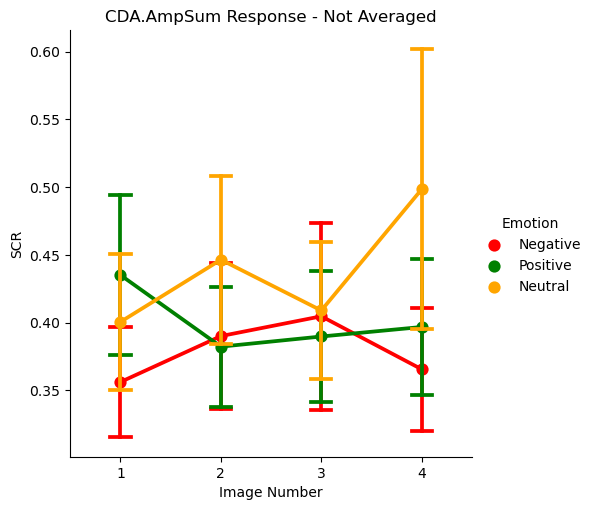

In [39]:
import seaborn as sns

color_map = {
        'Negative': 'red',
        'Neutral': 'orange',
        'Positive': 'green'
    }


sns.catplot(data=all_subjects, x="Image", y="SCR", hue="Emotion", errorbar="se", capsize=.2, kind="point", palette=color_map)
plt.title(f"{measurement} Response - Not Averaged")
plt.xlabel("Image Number")
plt.ylabel("SCR")

/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0, 0.5, 'Count')

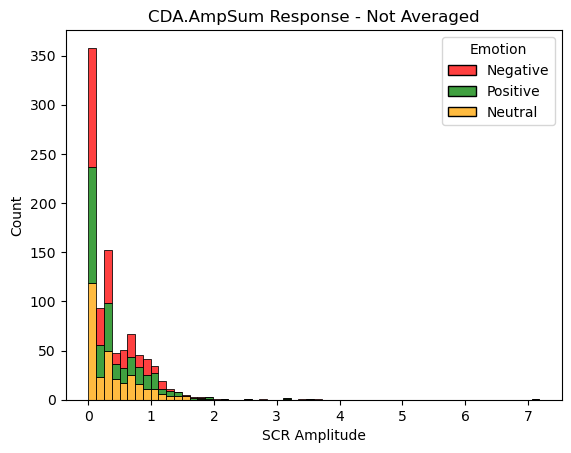

In [40]:
sns.histplot(data=all_subjects, x="SCR", hue="Emotion", palette=color_map, multiple="stack")
plt.title(f"{measurement} Response - Not Averaged")
plt.xlabel("SCR Amplitude")
plt.ylabel("Count")

/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'CDA.AmpSum by Emotion - Not Averaged')

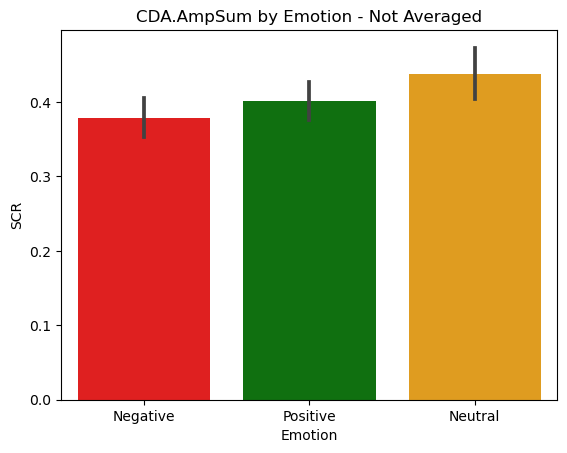

In [41]:
sns.barplot(data=all_subjects, x="Emotion", y="SCR", palette=color_map, errorbar="se")
plt.title(f"{measurement} by Emotion - Not Averaged")

/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0, 0.5, 'Count')

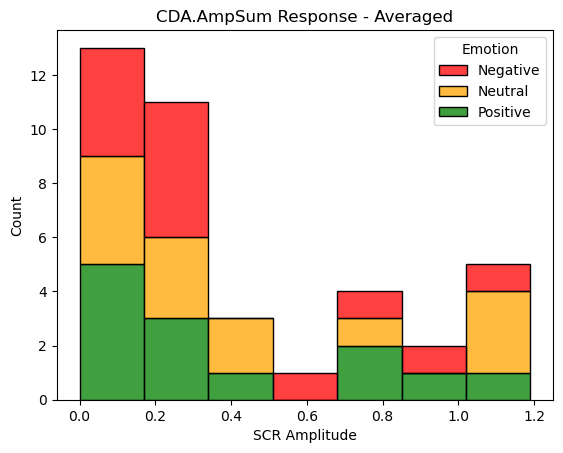

In [42]:
sns.histplot(data=averaged, x="SCR", hue="Emotion", palette=color_map, multiple="stack")
plt.title(f"{measurement} Response - Averaged")
plt.xlabel("SCR Amplitude")
plt.ylabel("Count")

/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'CDA.AmpSum by Emotion - Averaged')

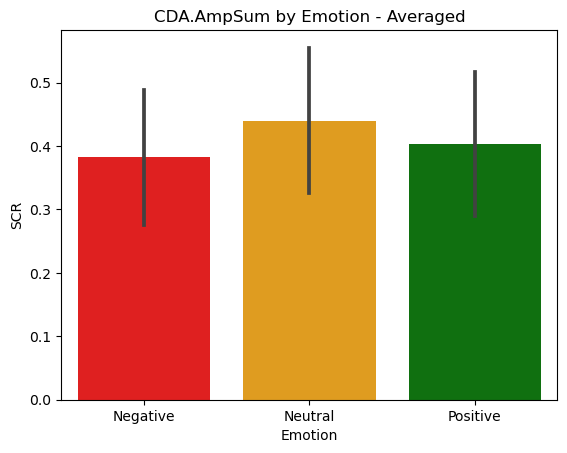

In [43]:
sns.barplot(data=averaged, x="Emotion", y="SCR", palette=color_map, errorbar="se")
plt.title(f"{measurement} by Emotion - Averaged")

In [44]:
from scipy import stats

negative = averaged[averaged["Emotion"] == "Negative"]["SCR"]
neutral = averaged[averaged["Emotion"] == "Neutral"]["SCR"]
positive = averaged[averaged["Emotion"] == "Positive"]["SCR"]

t_stat, p_val = stats.ttest_ind(negative, neutral)
print(f"Negative vs Neutral: t-statistic = {t_stat}, p-value = {p_val}")
t_stat, p_val = stats.ttest_ind(negative, positive)
print(f"Negative vs Positive: t-statistic = {t_stat}, p-value = {p_val}")
t_stat, p_val = stats.ttest_ind(neutral, positive)
print(f"Neutral vs Positive: t-statistic = {t_stat}, p-value = {p_val}")

Negative vs Neutral: t-statistic = -0.37173012723415105, p-value = 0.7133556303535242
Negative vs Positive: t-statistic = -0.13597271175711975, p-value = 0.892976949109766
Neutral vs Positive: t-statistic = 0.22935584582949098, p-value = 0.820535703734751


/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(45.937499999999986, 0.5, 'SCR')

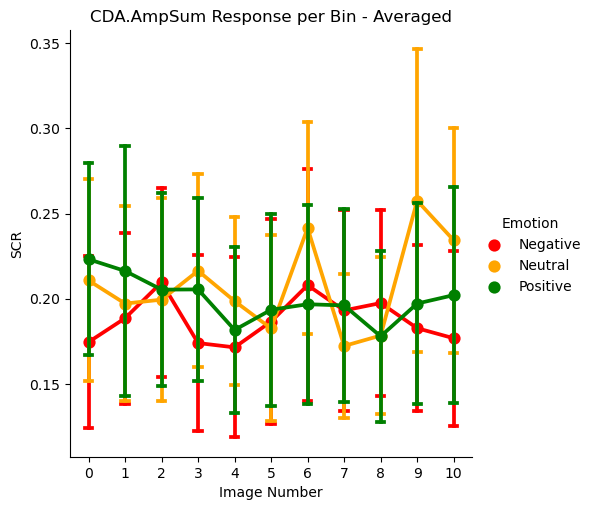

In [45]:
import seaborn as sns

sns.catplot(data=binned_df, x="Bin", y="SCR", hue="Emotion", errorbar="se", capsize=.2, kind="point", palette=color_map)
plt.title(f"{measurement} Response per Bin - Averaged")
plt.xlabel("Image Number")
plt.ylabel("SCR")